# Load and Analyze Dataset

* Use the diabetes dataset from the sklearn.datasets module.

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

* Load the dataset and display basic information such as the feature names, target variable, and dataset dimensions

In [ ]:
print("Feature names:", diabetes.feature_names)
print("Target variable:", 'diabetes progression')
print("Dataset dimensions:", diabetes.data.shape)

Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target variable: diabetes progression
Dataset dimensions: (442, 10)


* Perform an exploratory data analysis (EDA) by visualizing the distribution of the target variable and the relationships between features and the target using scatter plots.

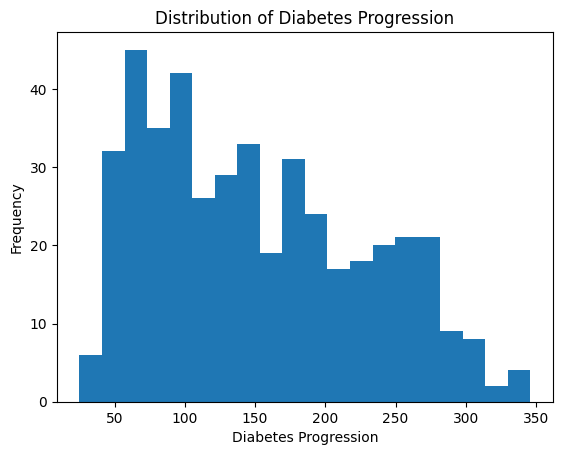

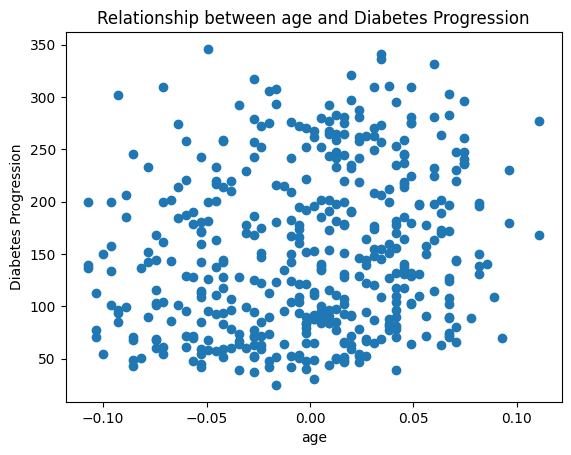

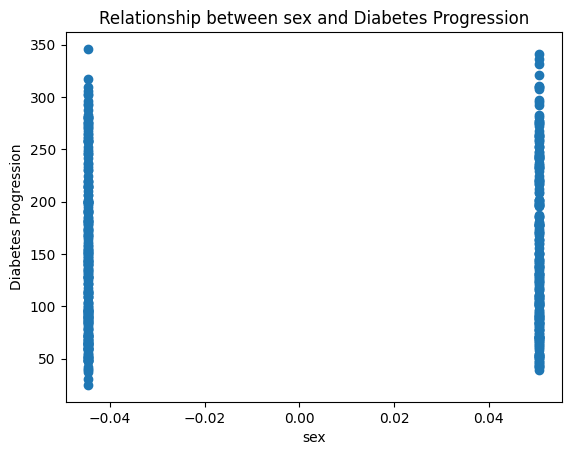

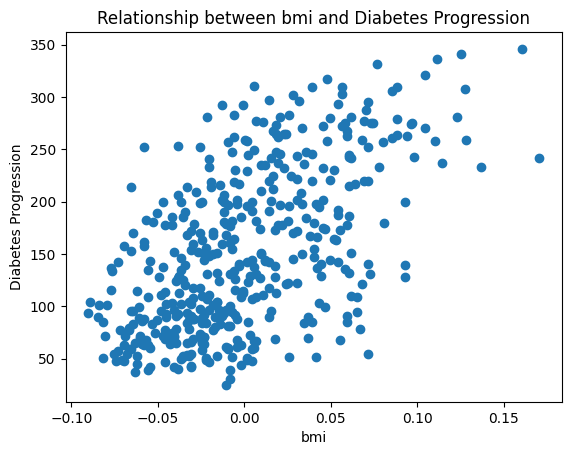

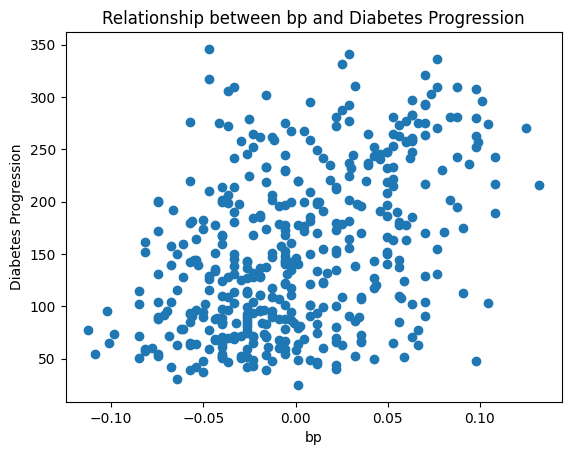

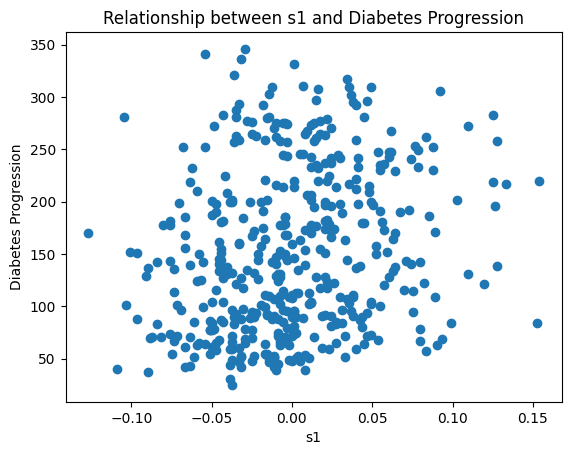

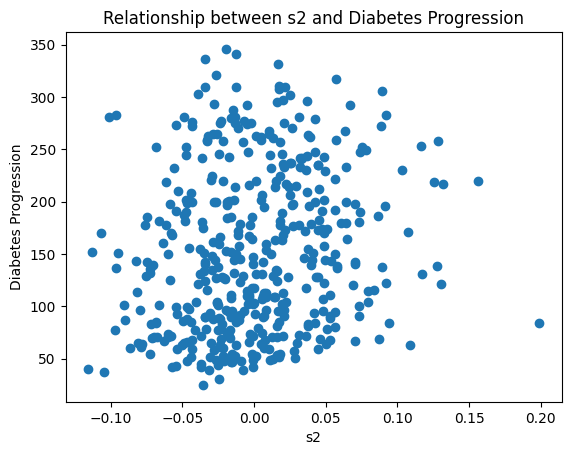

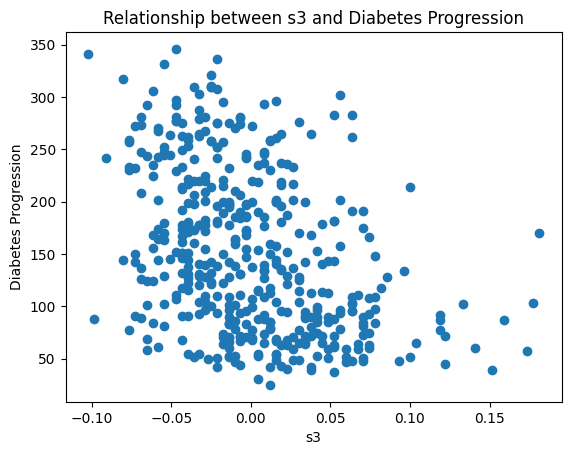

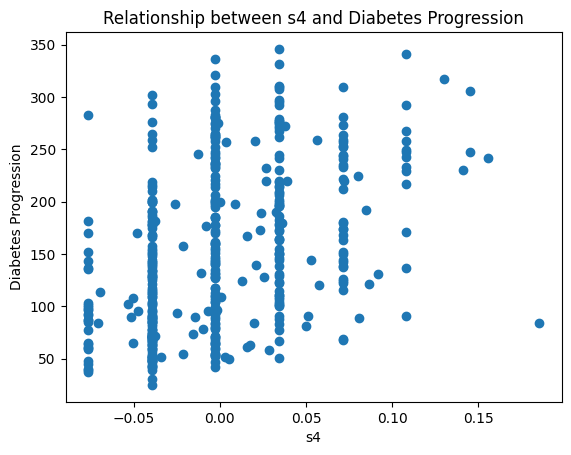

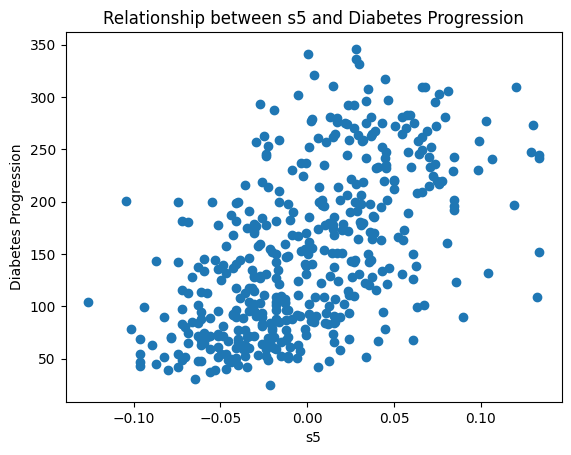

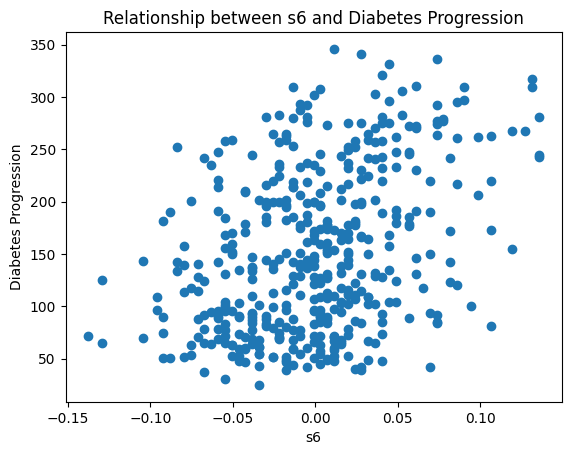

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y, bins=20)
plt.xlabel('Diabetes Progression')
plt.ylabel('Frequency')
plt.title('Distribution of Diabetes Progression')
plt.show()

for i, feature_name in enumerate(diabetes.feature_names):
    plt.scatter(X[:, i], y)
    plt.xlabel(feature_name)
    plt.ylabel('Diabetes Progression')
    plt.title(f'Relationship between {feature_name} and Diabetes Progression')
    plt.show()

# Split the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build and Train a Linear Regression Model

* build a linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

* train the model on the training data.

In [ ]:
model.fit(X_train, y_train)


LinearRegression()

* Evaluate the model’s performance on both the training and testing sets. Calculate and display the mean squared error (MSE) for both sets.

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)


print(f"Training MSE: {mse_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}")

Training MSE: 3016.79
Testing MSE: 2286.95


Observation:
The training and testing MSE values are both high (based on range of diabetes progression value)

# Apply Ridge Regularization

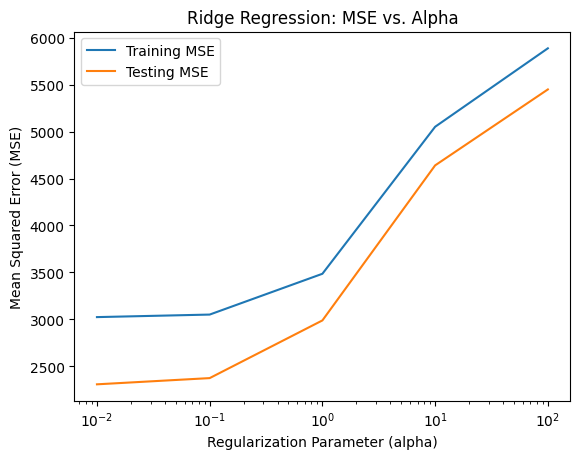

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge


alphas = [0.01, 0.1, 1, 10, 100] #defining a range of alpha

mse_train_values = []#initializing lists to store MSE
mse_test_values = []#initializing lists to store MSE

for alpha in alphas:

    ridge_model = Ridge(alpha=alpha) #creating a ridge regression model with the current alpha
    ridge_model.fit(X_train, y_train)#training the model

    y_train_pred = ridge_model.predict(X_train)#making predictions on the training and testing sets
    y_test_pred = ridge_model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)#calculating the MSE
    mse_test = mean_squared_error(y_test, y_test_pred)#calculating the MSE

    mse_train_values.append(mse_train)#appending the MSE values to the lists
    mse_test_values.append(mse_test)

#ploting the MSE as a function of alpha:
plt.plot(alphas, mse_train_values, label="Training MSE")
plt.plot(alphas, mse_test_values, label="Testing MSE")
plt.xscale("log")
plt.xlabel("Regularization Parameter (alpha)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Ridge Regression: MSE vs. Alpha")
plt.legend()
plt.show()

Observation: The larger the alpha, the faster the increase in MSE

# Find the Best Regularization Parameter (using RidgeCV)

In [ ]:
from sklearn.linear_model import RidgeCV

alphas = [0.01, 0.1, 1, 10, 100]

#creating  a RidgeCV object:
ridge_cv = RidgeCV(alphas=alphas, cv=5)

#fiting the RidgeCV model to the training data:
ridge_cv.fit(X_train, y_train)

# selecting the best alpha:
best_alpha = ridge_cv.alpha_


print(f"Best alpha: {best_alpha}")
print(f"Training MSE with best alpha: {mean_squared_error(y_train, ridge_cv.predict(X_train)):.2f}")
print(f"Testing MSE with best alpha: {mean_squared_error(y_test, ridge_cv.predict(X_test)):.2f}")

Best alpha: 0.01
Training MSE with best alpha: 3023.93
Testing MSE with best alpha: 2307.94


# Compare Results

In [ ]:

ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)
y_train_pred_ridge = ridge_best.predict(X_train)
y_test_pred_ridge = ridge_best.predict(X_test)
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)


print("Linear Regression:")
print(f"  Training MSE: {mse_train:.2f}")
print(f"  Testing MSE: {mse_test:.2f}")

print("\nRidge Regression (Best Alpha):")
print(f"  Training MSE: {mse_train_ridge:.2f}")
print(f"  Testing MSE: {mse_test_ridge:.2f}")



Linear Regression:
  Training MSE: 5887.05
  Testing MSE: 5449.17

Ridge Regression (Best Alpha):
  Training MSE: 3023.93
  Testing MSE: 2307.94


In [ ]:
print("\nAnalysis:")
print("Ridge Regression with the best alpha performed better than Linear Regression, indicating that regularization helped reduce overfitting and improve generalization to unseen data.")
print("\nImportance of Regularization:")
print("Regularization, such as Ridge Regression, is crucial in linear models to prevent overfitting. Overfitting occurs when the model learns the training data too well, including noise and random fluctuations. This leads to poor performance on new, unseen data. Regularization adds a penalty term to the loss function, discouraging the model from assigning excessively large weights to features. By constraining the model's complexity, regularization promotes better generalization and reduces the risk of overfitting, leading to more robust and reliable predictions.")


Analysis:
Ridge Regression with the best alpha performed better than Linear Regression, indicating that regularization helped reduce overfitting and improve generalization to unseen data.

Importance of Regularization:
Regularization, such as Ridge Regression, is crucial in linear models to prevent overfitting. Overfitting occurs when the model learns the training data too well, including noise and random fluctuations. This leads to poor performance on new, unseen data. Regularization adds a penalty term to the loss function, discouraging the model from assigning excessively large weights to features. By constraining the model's complexity, regularization promotes better generalization and reduces the risk of overfitting, leading to more robust and reliable predictions.
